<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncodersFaceSketch/blob/main/Deep_Convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Convolutional autoencoder**

Data Preprocessing

In [1]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

  5%|▍         | 9/188 [00:00<00:04, 41.26it/s]

Image is  [[[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 [[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 [[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 ...

 [[ 13  18  19]
  [ 23  28  29]
  [ 26  31  32]
  ...
  [ 27  56  83]
  [ 27  56  83]
  [ 29  58  85]]

 [[ 27  35  35]
  [ 24  32  32]
  [ 18  26  26]
  ...
  [ 29  59  86]
  [ 21  50  77]
  [ 30  59  86]]

 [[ 27  35  35]
  [ 24  32  32]
  [ 18  26  26]
  ...
  [ 28  58  85]
  [ 21  50  77]
  [ 32  61  88]]]
Image is  [[[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [214 186 115]
  [214 187 113]
  [214 187 113]]

 [[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [215 187 116]
  [215 188 114]
  [215 188 114]]

 [[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [216 188 117]
  [216 189 115]
  [216 189 115]]

 ...

 [[ 90 222 246]
  [ 88 224 250]


  7%|▋         | 14/188 [00:00<00:04, 42.27it/s]

Image is  [[[237 211 135]
  [238 212 136]
  [238 212 136]
  ...
  [235 211 139]
  [235 211 139]
  [235 211 139]]

 [[238 212 136]
  [239 213 137]
  [239 213 137]
  ...
  [236 212 140]
  [235 211 139]
  [235 211 139]]

 [[240 214 138]
  [240 214 138]
  [240 214 138]
  ...
  [236 212 140]
  [236 212 140]
  [235 211 139]]

 ...

 [[244 253 255]
  [244 253 255]
  [227 233 238]
  ...
  [254 254 254]
  [254 254 254]
  [253 253 253]]

 [[238 246 246]
  [239 244 245]
  [227 232 235]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[234 239 240]
  [230 235 236]
  [220 223 227]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
Image is  [[[220 189 104]
  [220 189 104]
  [220 189 104]
  ...
  [211 184 104]
  [211 184 104]
  [210 183 103]]

 [[220 189 104]
  [220 189 104]
  [221 190 105]
  ...
  [211 184 104]
  [211 184 104]
  [210 183 103]]

 [[220 189 104]
  [221 190 105]
  [221 190 105]
  ...
  [212 185 105]
  [211 184 104]
  [211 184 104]]

 ...

 [[197 236 251]
  [195 236 251]


 14%|█▍        | 26/188 [00:00<00:03, 47.32it/s]

Image is  [[[233 212 120]
  [233 212 120]
  [233 212 120]
  ...
  [ 25  16   0]
  [ 26  17   0]
  [ 27  18   0]]

 [[233 212 120]
  [233 212 120]
  [233 212 120]
  ...
  [211 201 141]
  [212 201 141]
  [212 202 142]]

 [[234 213 121]
  [234 213 121]
  [234 213 121]
  ...
  [219 206 138]
  [222 206 139]
  [221 208 140]]

 ...

 [[196 175  84]
  [196 175  84]
  [197 176  85]
  ...
  [207 193 110]
  [207 193 110]
  [207 193 110]]

 [[201 180  89]
  [198 177  86]
  [196 175  84]
  ...
  [208 194 112]
  [209 195 113]
  [210 196 114]]

 [[201 180  89]
  [198 177  86]
  [196 175  84]
  ...
  [208 194 112]
  [209 195 113]
  [210 196 114]]]
Image is  [[[241 221 126]
  [241 221 126]
  [241 221 126]
  ...
  [240 220 135]
  [240 220 135]
  [240 220 135]]

 [[241 221 126]
  [241 221 126]
  [241 221 126]
  ...
  [240 220 135]
  [240 220 135]
  [240 220 135]]

 [[241 221 126]
  [241 221 126]
  [241 221 126]
  ...
  [240 220 135]
  [240 220 135]
  [240 220 135]]

 ...

 [[176 200 218]
  [186 210 228]


 21%|██▏       | 40/188 [00:00<00:02, 56.64it/s]

Image is  [[[  0   0  10]
  [  0   0  10]
  [  0   0   9]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 [[  0   0   3]
  [  0   0   3]
  [  0   0   3]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 [[ 10   7   2]
  [  9   6   1]
  [  8   5   0]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 ...

 [[214 185 100]
  [214 185 100]
  [214 185 100]
  ...
  [215 189 105]
  [215 189 105]
  [215 189 105]]

 [[212 183  98]
  [213 184  99]
  [214 185 100]
  ...
  [215 189 105]
  [215 189 105]
  [214 188 104]]

 [[212 183  98]
  [213 184  99]
  [214 185 100]
  ...
  [215 189 105]
  [215 189 105]
  [214 188 104]]]
Image is  [[[240 211 126]
  [241 212 127]
  [243 214 129]
  ...
  [239 213 137]
  [239 213 137]
  [239 213 137]]

 [[241 212 127]
  [241 212 127]
  [243 214 129]
  ...
  [237 211 135]
  [238 212 136]
  [238 212 136]]

 [[241 212 127]
  [242 213 128]
  [242 213 128]
  ...
  [237 211 135]
  [237 211 135]
  [237 211 135]]

 ...

 [[ 33  38  47]
  [ 48  57  66]


 29%|██▉       | 55/188 [00:01<00:02, 59.47it/s]

Image is  [[[ 11   0   1]
  [ 11   0   1]
  [ 11   0   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  5   0   0]
  [  5   0   0]
  [  5   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   3   0]
  [  0   3   0]
  [  0   3   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
Image is  [[[242 211 126]
  [241 210 125]
  [241 210 125]
  ...
  [237 209 138]
  [237 209 138]
  [238 210 139]]

 [[242 211 126]
  [242 211 126]
  [241 210 125]
  ...
  [237 209 138]
  [238 210 139]
  [238 210 139]]

 [[242 211 126]
  [242 211 126]
  [241 210 125]
  ...
  [237 209 138]
  [238 210 139]
  [238 210 139]]

 ...

 [[255 241 215]
  [255 248 222]


 33%|███▎      | 62/188 [00:01<00:02, 58.45it/s]

Image is  [[[255 227 144]
  [255 227 144]
  [255 226 143]
  ...
  [255 228 148]
  [255 228 148]
  [255 228 148]]

 [[255 227 144]
  [255 227 144]
  [255 227 144]
  ...
  [255 228 148]
  [255 228 148]
  [255 228 148]]

 [[255 229 145]
  [255 229 145]
  [255 228 144]
  ...
  [255 228 148]
  [255 228 148]
  [255 228 148]]

 ...

 [[227 202 128]
  [227 203 127]
  [227 203 127]
  ...
  [225 203 131]
  [225 203 131]
  [225 203 131]]

 [[227 204 129]
  [227 204 128]
  [228 204 128]
  ...
  [225 203 131]
  [225 203 131]
  [225 203 131]]

 [[227 204 129]
  [227 204 128]
  [228 204 128]
  ...
  [225 203 131]
  [225 203 131]
  [225 203 131]]]
Image is  [[[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[  0   0   1]
  [  0   0   0]
  [  0   0   1]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[  0   0   0]
  [  0   1   0]
  [  0   0   0]
  ...
  [  0   1   0]
  [  0   0   0]
  [  0   1   0]]

 ...

 [[235 207 136]
  [233 205 134]


 40%|████      | 76/188 [00:01<00:01, 61.18it/s]

Image is  [[[235 205 122]
  [235 205 122]
  [235 205 122]
  ...
  [223 197 121]
  [223 197 121]
  [223 197 121]]

 [[235 205 122]
  [235 205 122]
  [235 205 122]
  ...
  [223 197 121]
  [223 197 121]
  [223 197 121]]

 [[236 206 123]
  [236 206 123]
  [236 206 123]
  ...
  [224 198 122]
  [224 198 122]
  [224 198 122]]

 ...

 [[220 191 116]
  [220 191 116]
  [220 191 116]
  ...
  [221 198 123]
  [221 198 123]
  [221 198 123]]

 [[221 192 117]
  [221 192 117]
  [221 192 117]
  ...
  [218 195 120]
  [219 196 121]
  [220 197 122]]

 [[221 192 117]
  [221 192 117]
  [221 192 117]
  ...
  [218 195 120]
  [219 196 121]
  [220 197 122]]]
Image is  [[[  7   0   1]
  [  7   0   1]
  [  7   0   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  4   0   0]
  [  2   0   0]
  [  4   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   3   0]
  [  0   4   0]
  [  0   3   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[254 254 254]
  [254 254 254]


 48%|████▊     | 90/188 [00:01<00:01, 56.55it/s]

Image is  [[[178 149  64]
  [177 148  63]
  [177 148  63]
  ...
  [177 149  65]
  [177 149  65]
  [177 149  65]]

 [[178 149  64]
  [177 148  63]
  [177 148  63]
  ...
  [177 149  65]
  [177 149  65]
  [177 149  65]]

 [[178 149  64]
  [178 149  64]
  [177 148  63]
  ...
  [177 149  65]
  [177 149  65]
  [177 149  65]]

 ...

 [[180 151  76]
  [180 151  76]
  [180 151  76]
  ...
  [196 219 227]
  [202 223 231]
  [205 226 234]]

 [[178 149  74]
  [178 149  74]
  [179 150  75]
  ...
  [202 225 233]
  [205 228 236]
  [207 230 238]]

 [[178 149  74]
  [178 149  74]
  [179 150  75]
  ...
  [202 225 233]
  [205 228 236]
  [207 230 238]]]
Image is  [[[171 144  64]
  [171 144  64]
  [171 144  64]
  ...
  [  0   5   0]
  [  0   5   0]
  [  0   6   0]]

 [[171 144  64]
  [171 144  64]
  [171 144  64]
  ...
  [  0   4   0]
  [  0   3   0]
  [  0   4   0]]

 [[171 144  64]
  [171 144  64]
  [171 144  64]
  ...
  [  0   2   0]
  [  0   1   0]
  [  0   2   0]]

 ...

 [[  0   0   0]
  [  0   0   0]


 51%|█████     | 96/188 [00:01<00:01, 53.96it/s]

 [[[250 220 141]
  [250 220 141]
  [250 220 141]
  ...
  [246 217 143]
  [246 217 143]
  [246 217 143]]

 [[250 220 141]
  [250 220 141]
  [250 220 141]
  ...
  [247 218 144]
  [246 217 143]
  [246 217 143]]

 [[250 220 141]
  [250 220 141]
  [250 220 141]
  ...
  [247 218 144]
  [247 218 144]
  [246 217 143]]

 ...

 [[236 207 133]
  [236 207 133]
  [237 208 134]
  ...
  [228 202 135]
  [228 202 135]
  [228 202 135]]

 [[237 208 134]
  [237 208 134]
  [237 208 134]
  ...
  [228 202 135]
  [228 202 135]
  [228 202 135]]

 [[237 208 134]
  [237 208 134]
  [237 208 134]
  ...
  [228 202 135]
  [228 202 135]
  [228 202 135]]]
Image is  [[[  0   0   4]
  [  0   0   4]
  [  0   0   4]
  ...
  [  9   0   5]
  [  7   0   3]
  [  7   0   3]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 11   2   0]
  [ 12   3   0]
  [ 16   7   0]]

 [[  0   4   0]
  [  0   4   0]
  [  0   4   0]
  ...
  [ 93  84  47]
  [120 111  73]
  [137 128  90]]

 ...

 [[233 204 137]
  [233 204 137]
  [233 20

 57%|█████▋    | 108/188 [00:02<00:01, 50.58it/s]

Image is  [[[239 217 129]
  [239 217 129]
  [239 217 129]
  ...
  [244 225 138]
  [245 226 139]
  [245 226 139]]

 [[240 218 130]
  [240 218 130]
  [240 218 130]
  ...
  [244 225 138]
  [245 226 139]
  [245 226 139]]

 [[242 220 132]
  [242 220 132]
  [242 220 132]
  ...
  [244 225 138]
  [245 226 139]
  [245 226 139]]

 ...

 [[134 124  90]
  [135 125  91]
  [134 124  90]
  ...
  [118 109  76]
  [122 113  80]
  [125 116  83]]

 [[132 122  88]
  [127 117  83]
  [122 112  78]
  ...
  [110 101  68]
  [116 107  74]
  [125 116  83]]

 [[133 123  89]
  [129 119  85]
  [125 115  81]
  ...
  [110 101  68]
  [116 107  74]
  [125 116  83]]]
Image is  [[[ 11   0   0]
  [ 11   0   0]
  [ 11   0   0]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[  5   0   0]
  [  5   0   0]
  [  5   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   4]
  [  0   0   3]
  [  0   0   4]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]

 ...

 [[230 213 127]
  [230 213 127]


 63%|██████▎   | 119/188 [00:02<00:01, 42.67it/s]

Image is  [[[  0   1   1]
  [  0   1   1]
  [  0   1   1]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[  2   1   3]
  [  2   1   3]
  [  2   1   3]
  ...
  [  1   2   6]
  [  1   2   6]
  [  1   2   6]]

 ...

 [[210 180 101]
  [210 180 101]
  [210 180 101]
  ...
  [221 194 113]
  [221 194 113]
  [221 194 113]]

 [[211 181 102]
  [211 181 102]
  [211 181 102]
  ...
  [220 193 112]
  [221 194 113]
  [222 195 114]]

 [[211 181 102]
  [211 181 102]
  [211 181 102]
  ...
  [220 193 112]
  [221 194 113]
  [222 195 114]]]
Image is  [[[224 189  91]
  [224 189  91]
  [224 189  91]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]

 [[224 189  91]
  [224 189  91]
  [224 189  91]
  ...
  [  0   2   2]
  [  0   2   3]
  [  0   2   2]]

 [[225 190  92]
  [225 190  92]
  [225 190  92]
  ...
  [ 11   0   4]
  [ 11   0   6]
  [ 11   0   4]]

 ...

 [[202 220 227]
  [205 223 230]


 69%|██████▉   | 130/188 [00:02<00:01, 46.32it/s]

Image is  [[[235 206 115]
  [236 207 116]
  [237 208 117]
  ...
  [238 211 125]
  [238 211 125]
  [238 211 125]]

 [[235 206 115]
  [236 207 116]
  [237 208 117]
  ...
  [238 211 125]
  [238 211 125]
  [238 211 125]]

 [[236 206 117]
  [236 206 117]
  [237 207 118]
  ...
  [238 211 125]
  [238 211 125]
  [238 211 125]]

 ...

 [[230 200 111]
  [230 200 111]
  [230 200 111]
  ...
  [ 75  81  76]
  [ 88  94  89]
  [ 81  87  82]]

 [[229 199 110]
  [229 199 110]
  [229 199 110]
  ...
  [ 79  83  77]
  [ 81  85  79]
  [ 83  87  81]]

 [[229 199 110]
  [229 199 110]
  [229 199 110]
  ...
  [  0   3   0]
  [  0   3   0]
  [  0   3   0]]]
Image is  [[[  4   3   0]
  [  4   3   0]
  [  4   3   0]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  2   2   0]
  [  2   2   0]
  [  2   2   0]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 ...

 [[211 177  93]
  [209 178  93]


 72%|███████▏  | 135/188 [00:02<00:01, 46.31it/s]

Image is  [[[  0   2   1]
  [  0   2   1]
  [  0   2   1]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  0   1   0]
  [  0   0   1]
  [  0   1   0]]

 [[  0   2   3]
  [  0   2   3]
  [  0   2   3]
  ...
  [  0   2   3]
  [  0   1   5]
  [  0   2   3]]

 ...

 [[225 195 106]
  [226 196 107]
  [227 197 108]
  ...
  [234 207 120]
  [234 207 120]
  [234 207 120]]

 [[223 193 104]
  [224 194 105]
  [225 195 106]
  ...
  [232 205 118]
  [232 205 118]
  [232 205 118]]

 [[223 193 104]
  [224 194 105]
  [225 195 106]
  ...
  [232 205 118]
  [232 205 118]
  [232 205 118]]]
Image is  [[[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 [[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 [[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 ...

 [[  0   0   9]
  [  0   0  10]


 79%|███████▊  | 148/188 [00:02<00:00, 48.09it/s]

Image is  [[[235 204 119]
  [235 204 119]
  [235 204 119]
  ...
  [236 207 132]
  [236 207 132]
  [236 207 132]]

 [[235 204 119]
  [235 204 119]
  [235 204 119]
  ...
  [237 208 133]
  [236 207 132]
  [236 207 132]]

 [[235 204 119]
  [235 204 119]
  [235 204 119]
  ...
  [237 208 133]
  [237 208 133]
  [236 207 132]]

 ...

 [[204 177  97]
  [203 176  96]
  [203 176  96]
  ...
  [221 197 113]
  [221 197 113]
  [221 197 113]]

 [[205 178  98]
  [205 178  98]
  [205 178  98]
  ...
  [219 195 111]
  [219 195 111]
  [220 196 112]]

 [[205 178  98]
  [205 178  98]
  [205 178  98]
  ...
  [219 195 111]
  [219 195 111]
  [220 196 112]]]
Image is  [[[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  2   0   0]
  [  0   0   0]
  [  2   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  4   0   0]
  [  2   0   0]
  [  4   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[224 205 154]
  [227 212 163]


 81%|████████▏ | 153/188 [00:03<00:00, 37.94it/s]


Image is  [[[219 189 102]
  [219 189 102]
  [219 189 102]
  ...
  [  0   0   1]
  [  0   2   3]
  [  0   4   5]]

 [[219 189 102]
  [219 189 102]
  [219 189 102]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[220 190 103]
  [220 190 103]
  [220 190 103]
  ...
  [  0   0   4]
  [  3   4   8]
  [  6   7  11]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [229 253 243]
  [229 250 241]
  [228 249 240]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [236 255 245]
  [234 254 241]
  [236 255 242]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [238 255 244]
  [234 255 240]
  [238 255 242]]]
Image is  [[[  5   1   0]
  [  5   1   0]
  [  5   1   0]
  ...
  [224 204 117]
  [224 204 117]
  [224 204 117]]

 [[ 18  13   0]
  [ 13   8   0]
  [  9   4   0]
  ...
  [224 204 117]
  [224 204 117]
  [224 204 117]]

 [[ 18   9   0]
  [ 18   9   0]
  [ 21  12   0]
  ...
  [225 205 118]
  [225 205 118]
  [225 205 118]]

 ...

 [[ 42  56  55]
  [ 42  56  55]

 88%|████████▊ | 166/188 [00:03<00:00, 48.40it/s]

Image is  [[[242 210 127]
  [242 210 127]
  [242 210 127]
  ...
  [236 207 132]
  [236 207 132]
  [236 207 132]]

 [[242 210 127]
  [242 210 127]
  [243 211 128]
  ...
  [236 207 132]
  [236 207 132]
  [236 207 132]]

 [[242 210 127]
  [243 211 128]
  [243 211 128]
  ...
  [237 208 133]
  [237 208 133]
  [237 208 133]]

 ...

 [[240 254 255]
  [235 249 255]
  [229 243 249]
  ...
  [226 218 188]
  [209 200 167]
  [199 189 155]]

 [[235 250 253]
  [241 255 255]
  [226 241 244]
  ...
  [230 230 216]
  [231 228 213]
  [235 231 213]]

 [[235 250 253]
  [241 255 255]
  [226 241 244]
  ...
  [233 237 232]
  [237 237 231]
  [243 241 233]]]
Image is  [[[234 207 126]
  [234 207 126]
  [234 207 126]
  ...
  [233 208 134]
  [233 208 134]
  [233 208 134]]

 [[234 207 126]
  [234 207 126]
  [235 208 127]
  ...
  [233 208 134]
  [233 208 134]
  [233 208 134]]

 [[234 207 126]
  [235 208 127]
  [235 208 127]
  ...
  [233 208 134]
  [233 208 134]
  [233 208 134]]

 ...

 [[ 40  44  45]
  [ 40  44  45]


 96%|█████████▌| 180/188 [00:03<00:00, 56.69it/s]

Image is  [[[  9   0   0]
  [  9   0   0]
  [  9   0   0]
  ...
  [  0   0   3]
  [  0   0   3]
  [  0   0   3]]

 [[  8   3   4]
  [  8   3   4]
  [  7   2   3]
  ...
  [  0   2   2]
  [  2   2   2]
  [  0   2   2]]

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  4   3   0]
  [  5   3   0]
  [  4   3   0]]

 ...

 [[228 198 119]
  [228 198 119]
  [228 198 119]
  ...
  [186 184 184]
  [191 188 184]
  [193 190 185]]

 [[229 199 120]
  [229 199 120]
  [229 199 120]
  ...
  [171 177 190]
  [171 176 185]
  [173 176 184]]

 [[229 199 120]
  [229 199 120]
  [229 199 120]
  ...
  [166 175 195]
  [167 174 191]
  [167 174 189]]]
Image is  [[[  0   5   0]
  [  0   5   0]
  [  0   5   0]
  ...
  [  4   1   0]
  [  4   1   0]
  [  4   1   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  2   0   0]
  [  2   0   0]
  [  2   0   0]]

 [[  8   0   7]
  [  8   0   7]
  [  8   0   7]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[244 211 131]
  [241 211 132]


100%|██████████| 188/188 [00:03<00:00, 50.50it/s]


[[[248 218 135]
  [248 218 135]
  [248 218 135]
  ...
  [243 214 139]
  [245 216 141]
  [246 217 142]]

 [[248 218 135]
  [248 218 135]
  [248 218 135]
  ...
  [244 215 140]
  [245 216 141]
  [246 217 142]]

 [[248 218 135]
  [248 218 135]
  [248 218 135]
  ...
  [245 216 141]
  [246 217 142]
  [246 217 142]]

 ...

 [[204 183 115]
  [202 183 116]
  [200 182 117]
  ...
  [221 197 121]
  [221 197 121]
  [222 198 122]]

 [[198 184 125]
  [195 183 125]
  [191 179 125]
  ...
  [219 195 119]
  [220 196 120]
  [221 197 121]]

 [[181 171 117]
  [179 171 118]
  [174 167 118]
  ...
  [219 195 119]
  [220 196 120]
  [221 197 121]]]
Image is  [[[216 187  96]
  [215 186  95]
  [215 186  95]
  ...
  [210 183  93]
  [210 183  93]
  [210 183  93]]

 [[217 188  97]
  [216 187  96]
  [216 187  96]
  ...
  [210 183  93]
  [210 183  93]
  [210 183  93]]

 [[217 188  97]
  [217 188  97]
  [216 187  96]
  ...
  [210 183  93]
  [210 183  93]
  [210 183  93]]

 ...

 [[  4   4   0]
  [  2   1   0]
  [  0   1

100%|██████████| 188/188 [00:02<00:00, 73.56it/s]


In [2]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [3]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Total number of sketch images: 1504
Total number of images: 1504
Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


Train Model for Face to Sketch

In [9]:
import keras
from keras import layers

input_img = keras.Input(shape=(256, 256, 3))


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
#decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)


autoencoder = keras.Model(input_img, decoder_output)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
decoder_output.shape

TensorShape([None, 256, 256, 3])

In [10]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         1160

Epoch 1/300
11/11 [==============================] - 7s 454ms/step - loss: 0.5522 - acc: 0.1859 - val_loss: 0.1883 - val_acc: 0.0151
Epoch 2/300
11/11 [==============================] - 3s 284ms/step - loss: 0.2170 - acc: 0.4035 - val_loss: 0.1723 - val_acc: 0.7969
Epoch 3/300
11/11 [==============================] - 3s 285ms/step - loss: 0.1756 - acc: 0.1846 - val_loss: 0.1548 - val_acc: 0.9142
Epoch 4/300
11/11 [==============================] - 3s 283ms/step - loss: 0.1620 - acc: 0.5235 - val_loss: 0.1438 - val_acc: 0.0833
Epoch 5/300
11/11 [==============================] - 3s 285ms/step - loss: 0.1529 - acc: 0.4562 - val_loss: 0.1368 - val_acc: 0.1342
Epoch 6/300
11/11 [==============================] - 3s 286ms/step - loss: 0.1450 - acc: 0.2833 - val_loss: 0.1319 - val_acc: 0.3815
Epoch 7/300
11/11 [==============================] - 3s 285ms/step - loss: 0.1377 - acc: 0.3549 - val_loss: 0.1297 - val_acc: 0.4202
Epoch 8/300
11/11 [==============================] - 3s 284ms/step - 

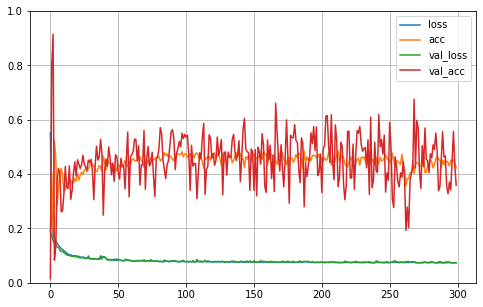

In [11]:
# Training for photo to sketch
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_image, train_sketch_image,
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))



# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

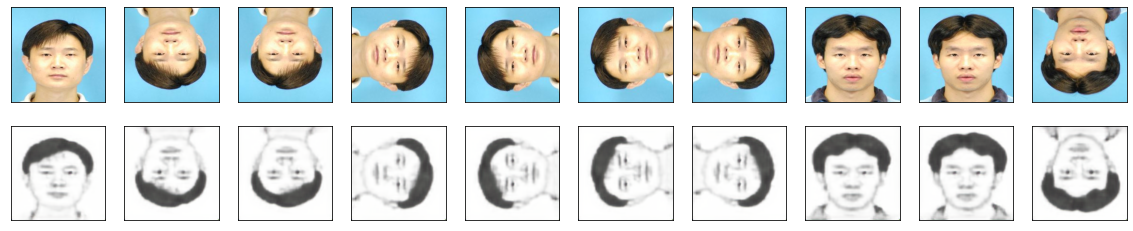

In [12]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train Model for Sketch to Face

Epoch 1/1500
11/11 [==============================] - 3s 237ms/step - loss: 0.2075 - acc: 0.1633 - val_loss: 0.1609 - val_acc: 0.3924
Epoch 2/1500
11/11 [==============================] - 3s 229ms/step - loss: 0.2086 - acc: 0.1871 - val_loss: 0.2291 - val_acc: 0.0770
Epoch 3/1500
11/11 [==============================] - 3s 231ms/step - loss: 0.2247 - acc: 0.0915 - val_loss: 0.2017 - val_acc: 0.0871
Epoch 4/1500
11/11 [==============================] - 2s 229ms/step - loss: 0.2096 - acc: 0.0907 - val_loss: 0.1937 - val_acc: 0.0863
Epoch 5/1500
11/11 [==============================] - 3s 230ms/step - loss: 0.1899 - acc: 0.0999 - val_loss: 0.1680 - val_acc: 0.1488
Epoch 6/1500
11/11 [==============================] - 3s 231ms/step - loss: 0.1715 - acc: 0.1854 - val_loss: 0.1554 - val_acc: 0.2124
Epoch 7/1500
11/11 [==============================] - 3s 229ms/step - loss: 0.1639 - acc: 0.2027 - val_loss: 0.1498 - val_acc: 0.1669
Epoch 8/1500
11/11 [==============================] - 3s 229ms

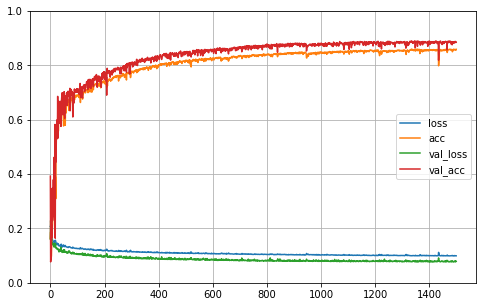

In [ ]:
# Training for Sketch to Photo
# Training
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_sketch_image,train_image,
                epochs=1500,
                batch_size=128,
                shuffle=True,
                validation_data=(test_sketch_image, test_image))



# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

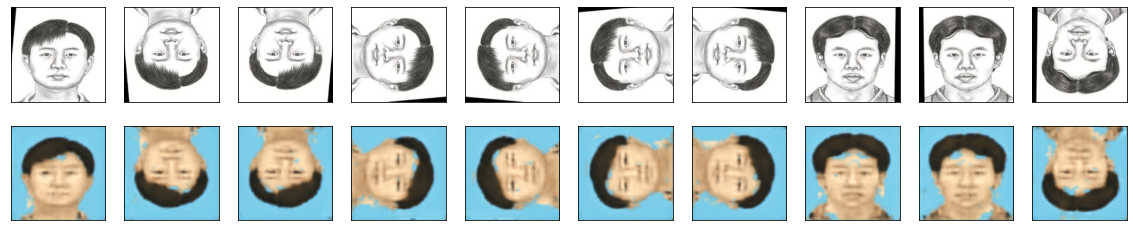

In [ ]:
decoded_imgs = autoencoder.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Hyperparameter Tuning**

In [ ]:
# def build_model(hp):  
#   model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(28,28,1)
#     ),
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(10, activation='softmax')
#   ])
  
#   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
  
#   return model

In [ ]:
# import tensorflow as tf

# def build_model(hp):
#   inputs = keras.Input(shape=(256, 256, 3))
#   x = inputs
#   for i in range(hp.Int('conv_blocks', 3, 5, default=3)):
#     filters = hp.Int('filters_' + str(i), 32, 256, step=32)
#     for _ in range(2):
#       x = keras.layers.Convolution2D(
#         filters, kernel_size=(3, 3), padding='same')(x)
#       x = keras.layers.BatchNormalization()(x)
#       x = keras.layers.ReLU()(x)
#     if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
#       x = keras.layers.MaxPool2D()(x)
#     else:
#       x = keras.layers.AvgPool2D()(x)
#   x = keras.layers.GlobalAvgPool2D()(x)
#   x = keras.layers.Dense(
#       hp.Int('hidden_size', 30, 100, step=10, default=50),
#       activation='relu')(x)
#   x = keras.layers.Dropout(
#       hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)
#   outputs = keras.layers.Dense(10, activation='softmax')(x)

#   model = keras.Model(inputs, outputs)
#   model.compile(
#     optimizer=keras.optimizers.Adam(
#       hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy'])
#   return model

def build_model(hp):
  input_img = keras.Input(shape=(256, 256, 3))
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  # for i in range(hp.Int('conv_blocks', 3, 5, default=3)):
    
  for i in range(2):
    # x = keras.layers.Conv2D(
    #   filters = hp.Int('filters_' + str(i), 16, 256, step=16), 
    #   kernel_size=hp.Choice('kernel' + str(i), values = [3,5]),
    #   activation='relu',
    #   padding='same')(x)
    x = keras.layers.Conv2D(
      filters = 16, 
      kernel_size=(3,3),
      activation='relu',
      padding='same')(x)

    if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = keras.layers.MaxPool2D(pool_size=(2, 2),padding='same')(x)
    else:
      x = keras.layers.AvgPool2D()(x)

  for _ in range(2):
    x = keras.layers.Conv2D(
      filters = 8, 
      kernel_size=(3,3),
      activation='relu',
      padding='same')(x)

    x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = layers.UpSampling2D((2, 2))(x)

  x = layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
  decoder_output = layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)
  autoencoder = keras.Model(input_img, decoder_output)
  autoencoder.compile(optimizer = tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), loss = 'mean_absolute_error',
              metrics = ['acc'])
  return autoencoder


In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


In [ ]:

# input_img = keras.Input(shape=(256, 256, 3))


# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# #decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# x = tf.keras.layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
# decoder_output = tf.keras.layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)


# autoencoder = keras.Model(input_img, decoder_output)
# #autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
#               metrics = ['acc'])
# decoder_output.shape

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          max_trials=5,directory='/content/output3',project_name="FaceToSketch")

In [ ]:
tuner_search.search(train_sketch_image,train_image,epochs=500,validation_split=0.1, validation_data=(test_sketch_image, test_image))

Trial 5 Complete [00h 14m 40s]
val_acc: 0.9056553244590759

Best val_acc So Far: 0.9211979508399963
Total elapsed time: 01h 05m 50s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         584 

In [ ]:
decoded_imgs = model.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()